In [2]:
import csv
import re
import pandas as pd
import numpy as np
import datetime

### Genre Word Cloud

In [3]:
###get the release season of each film
def getseason(path):
    df = pd.read_csv(path)
    season=[]
    for i in df['Release_date']:
        pattern = r'^\w+'                
        match= re.findall(pattern, i)
#         print(match)
        if match[0] == 'March' or match[0] =='April' or match[0] =='May':
            season.append('Spring')
        elif match[0] == 'June' or match[0] =='July' or match[0] =='August':
            season.append('Summer')
        elif match[0] == 'September' or match[0] =='October' or match[0] == 'November':
            season.append('Autumn')
        elif match[0] =='December' or match[0] =='January' or match[0] =='February':
            season.append('Winter')
        else:
            season.append(' ')
    df['Season']=season
    return df

In [4]:
path= 'Combine all 3(update).csv'
df = getseason(path)
df

,Unnamed: 0,Movie,Release_date,Language,Runtime,Budget,Revenue,Unnamed: 0_x,Name,Genre,Rating,Votes,BoxOffice,Year,Unnamed: 0_y,meter_score,audience_score,Season
0,0,the avengers,"May 4, 2012",English,2h 23m,"$220,000,000.00","$1,519,557,910.00",0.0,The Avengers,"Action, Adventure, Sci-Fi",8.1,1134273.0,"623,357,910",2012.0,0.0,NaN,NaN,Spring
1,1,snow white and the huntsman,"June 1, 2012",English,2h 7m,"$170,000,000.00","$396,600,000.00",16.0,Snow White and the Huntsman,"Action, Adventure, Drama",6.1,253972.0,"155,332,381",2012.0,16.0,48.0,52%,Summer
2,2,the hobbit: an unexpected journey,"December 14, 2012",English,2h 49m,"$250,000,000.00","$1,021,103,568.00",4.0,The Hobbit: An Unexpected Journey,"Adventure, Family, Fantasy",7.9,705872.0,"303,003,568",2012.0,4.0,92.0,86%,Winter
3,3,brave,"June 22, 2012",English,1h 33m,"$185,000,000.00","$538,983,207.00",7.0,Brave,"Animation, Adventure, Comedy",7.1,324942.0,"237,283,207",2012.0,7.0,92.0,86%,Summer
4,4,the dark knight rises,"July 20, 2012",English,2h 45m,"$250,000,000.00","$1,084,939,099.00",1.0,The Dark Knight Rises,"Action, Thriller",8.4,1343225.0,"448,139,099",2012.0,1.0,87.0,90%,Summer
5,5,django unchained,"December 11, 2012",English,2h 45m,"$100,000,000.00","$425,368,238.00",14.0,Django Unchained,"Drama, Western",8.4,1164954.0,"162,805,434",2012.0,14.0,NaN,83%,Winter
6,6,the amazing spider-man,"July 4, 2012",English,2h 16m,"$215,000,000.00","$752,215,857.00",6.0,The Amazing Spider-Man,"Action, Adventure, Sci-Fi",7.0,511325.0,"262,030,663",2012.0,6.0,92.0,86%,Summer
7,7,skyfall,"November 9, 2012",English,2h 23m,"$200,000,000.00","$1,108,561,013.00",3.0,Skyfall,"Action, Adventure, Thriller",7.8,580191.0,"304,360,277",2012.0,3.0,92.0,86%,Autumn
8,8,sexual chronicles of a french family,"June 1, 2012",French,1h 21m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2684.0,0.0,26%,Summer
9,9,the lorax,"March 1, 2012",English,1h 26m,"$70,000,000.00","$348,840,316.00",10.0,The Lorax,"Animation, Adventure, Comedy",6.4,87926.0,"214,030,500",2012.0,10.0,NaN,83%,Spring


In [5]:
###get the occurrence of each genre type
ds = pd.read_csv('Combine all 3(update).csv')
genrelist= []
for i in ds['Genre']:
    for s in (str(i)).split(","):
        s=s.strip()
        if s not in genrelist:
            genrelist.append(s)
# print(genrelist)
genre_occurences=[]
for g in genrelist:
    
    genre_occurences.append([g,ds.Genre.str.count(g).sum()])
# print(genre_occurences)
##drop the 'nan'
genre_occurences = [x for x in genre_occurences if x[0] != 'nan']
def getw(item):
    return item[1]

genre_occurences =sorted(genre_occurences,key=getw,reverse=True)
genre_occurences[:5]

[['Drama', 956.0],
 ['Comedy', 565.0],
 ['Action', 359.0],
 ['Adventure', 293.0],
 ['Thriller', 286.0]]

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

               1
0               
Drama      956.0
Comedy     565.0
Action     359.0
Adventure  293.0
Thriller   286.0
Romance    255.0
Crime      243.0
Horror     189.0
Biography  175.0
Mystery    137.0
Fantasy    111.0
Sci-Fi     105.0
Animation   91.0
History     73.0
Music       66.0
Family      53.0
Sport       37.0
War         23.0
Western     12.0
Musical     10.0


<Figure size 46080x34560 with 0 Axes>

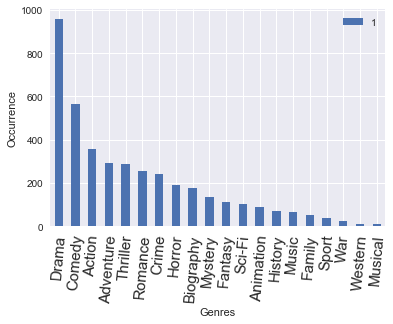

In [7]:
###plot film genre occurrence
dt = pd.DataFrame(genre_occurences,)
dt.set_index(0,inplace=True)
print(dt)
plt.figure(figsize=(640,480))
dt.plot.bar()
plt.xticks(rotation=85, fontsize = 15)
plt.xlabel("Genres")
plt.ylabel("Occurrence")
plt.show()

In [8]:
###define a function to control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

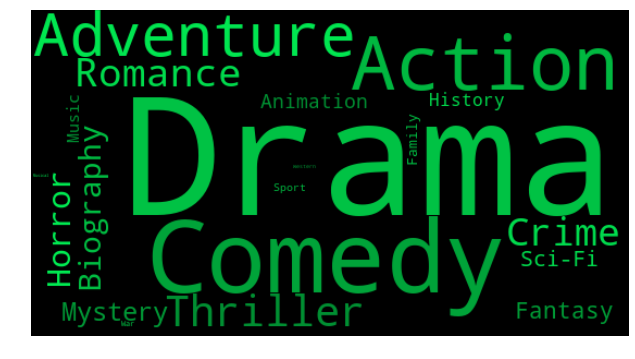

In [9]:
###word cloud of genre occurence
words = dict()
trunc_occurences = genre_occurences[:]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Convert Datetime Series
turn runtime into minutes

In [10]:
df
df1=df.set_index(['Movie'])
dfnew = df1[['Release_date','Language','Runtime','Budget','Revenue','BoxOffice','Genre','Rating','Votes','Year','Season']]
dfruntime=dfnew.dropna(thresh=3)

In [11]:
for x in range(len(dfruntime['Runtime'])):
    if isinstance(dfruntime['Runtime'].iloc[x],str):
        dfruntime['Runtime'].iloc[x]=datetime.datetime.strptime(dfruntime['Runtime'].iloc[x],'%Hh %Mm')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
for x in range(len(dfruntime['Runtime'])):
    if type(dfruntime['Runtime'].iloc[x])==datetime.datetime:
        a=dfruntime['Runtime'].iloc[x]
        dfruntime['Runtime'].iloc[x]=a.hour*60+a.minute

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
dfruntime

,Release_date,Language,Runtime,Budget,Revenue,BoxOffice,Genre,Rating,Votes,Year,Season
Movie,,,,,,,,,,,
the avengers,"May 4, 2012",English,143,"$220,000,000.00","$1,519,557,910.00","623,357,910","Action, Adventure, Sci-Fi",8.1,1134273.0,2012.0,Spring
snow white and the huntsman,"June 1, 2012",English,127,"$170,000,000.00","$396,600,000.00","155,332,381","Action, Adventure, Drama",6.1,253972.0,2012.0,Summer
the hobbit: an unexpected journey,"December 14, 2012",English,169,"$250,000,000.00","$1,021,103,568.00","303,003,568","Adventure, Family, Fantasy",7.9,705872.0,2012.0,Winter
brave,"June 22, 2012",English,93,"$185,000,000.00","$538,983,207.00","237,283,207","Animation, Adventure, Comedy",7.1,324942.0,2012.0,Summer
the dark knight rises,"July 20, 2012",English,165,"$250,000,000.00","$1,084,939,099.00","448,139,099","Action, Thriller",8.4,1343225.0,2012.0,Summer
django unchained,"December 11, 2012",English,165,"$100,000,000.00","$425,368,238.00","162,805,434","Drama, Western",8.4,1164954.0,2012.0,Winter
the amazing spider-man,"July 4, 2012",English,136,"$215,000,000.00","$752,215,857.00","262,030,663","Action, Adventure, Sci-Fi",7.0,511325.0,2012.0,Summer
skyfall,"November 9, 2012",English,143,"$200,000,000.00","$1,108,561,013.00","304,360,277","Action, Adventure, Thriller",7.8,580191.0,2012.0,Autumn
sexual chronicles of a french family,"June 1, 2012",French,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer


### Time Series Analysis

In [54]:
import pandas as pd
csv = 'Combine all 3(update).csv'
df = pd.read_csv(csv)

In [55]:
from matplotlib import *
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [56]:
df=df.dropna()

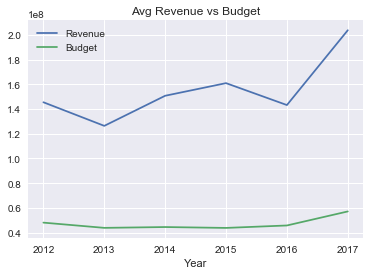

In [57]:
#cleaning
for i in ['Runtime','Revenue','Budget','Rating','BoxOffice','Votes']:
    df=df.dropna(subset=[i])
#conversion
for i in ['Revenue','Budget','Rating','BoxOffice','Votes']:
    df[i]=df[i].astype('str')
    df[i]= df[i].apply(lambda x:x.replace(',',''))
    df[i]= df[i].apply(lambda x:x.replace('$',''))
    df[i]=df[i].astype('float')
    
df.groupby(['Year'])['Revenue'].mean().plot(title='AvgRevenue',legend=True)
df.groupby(['Year'])['Budget'].mean().plot(title='Avg Revenue vs Budget', legend=True)

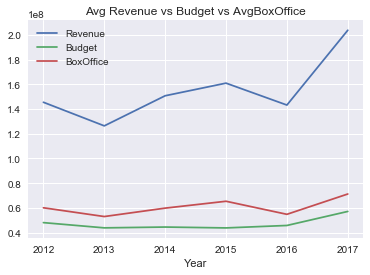

In [58]:
df.groupby(['Year'])['Revenue'].mean().plot(title='AvgRevenue',legend=True)
df.groupby(['Year'])['Budget'].mean().plot(title='Avg Revenue vs Budget', legend=True)
df.groupby(['Year'])['BoxOffice'].mean().plot(title='Avg Revenue vs Budget vs AvgBoxOffice',legend=True)

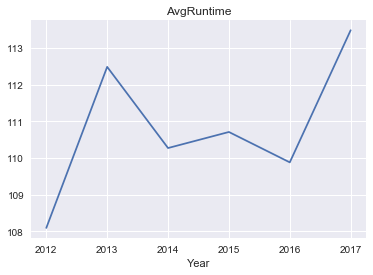

In [59]:
df=df.dropna(subset=['Runtime'])
df['Runtime']= df['Runtime'].apply(lambda x:datetime.datetime.strptime(x,'%Hh %Mm'))
df['Runtime']= df['Runtime'].apply(lambda x: x.hour*60+x.minute)
df.groupby(['Year'])['Runtime'].mean().plot(title='AvgRuntime')

### Getting Correllation Heatmap

In [51]:
data= dfruntime
X_train=data[['Runtime','Budget','Revenue','BoxOffice','Rating','Votes','Year']]
X_train=X_train.fillna(0)
X_train['Revenue']=X_train['Revenue'].astype('str')
X_train['Revenue']= X_train['Revenue'].apply(lambda x:x.replace('$',''))
X_train['Revenue']= X_train['Revenue'].apply(lambda x:x.replace(',',''))
X_train['Revenue']=X_train['Revenue'].astype('float')

X_train['Budget']=X_train['Budget'].astype('str')
X_train['Budget']= X_train['Budget'].apply(lambda x:x.replace('$',''))
X_train['Budget']= X_train['Budget'].apply(lambda x:x.replace(',',''))
X_train['Budget']=X_train['Budget'].astype('float')
X_train
columns=X_train.columns.tolist()
# y=X_train['imdb_score']
# X_train.drop(['imdb_score'],axis=1,inplace=True)
# X_train[:100]

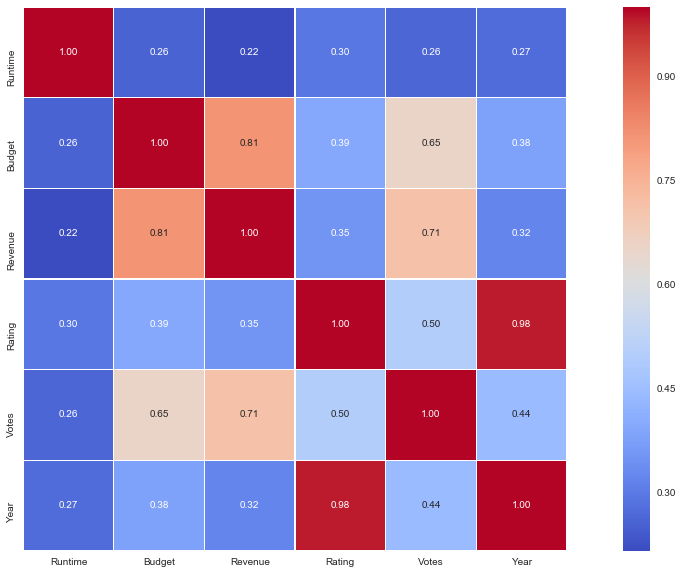

In [52]:
import seaborn as sns
corr_mat=X_train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,cbar=True,square=True,annot=True,fmt='.2f', annot_kws={'size': 10}, linewidth = 0.1, cmap = 'coolwarm')
